## ⏰🔔4주차 미션 내용 🔔⏰

Oppie 04팀 팀원: 토마토_리더, 열음, 이성우, 정준원, 최여진

In [28]:
#라이브러리 로딩
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

!pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")

## ✨ 데이타 검토 및 결측치파악  
- 데이타 전처리및 데이타 특성을 파악하는 작업을 합니다.

In [ ]:
#데이타검토
print(df.shape)
df.head()

(2772, 5)


,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [ ]:
#데이타 개수및 유형파악
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  2772 non-null   object
 1   상품군별     2772 non-null   object
 2   판매유형별    2772 non-null   object
 3   시점       2772 non-null   object
 4   데이터      2772 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 108.4+ KB


In [ ]:
# 문자형 통계값
df.describe(include="object")

,국가(대륙)별,상품군별,판매유형별,시점
count,2772,2772,2772,2772
unique,9,14,1,22
top,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4
freq,308,198,2772,126


In [ ]:
# 숫자형 통계값
df.describe()

,데이터
count,2772.000000
mean,1613.116522
std,4273.426107
min,-10003.000000
25%,41.750000
50%,291.500000
75%,1181.000000
max,47689.000000


/usr/local/lib/python3.10/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


<Axes: >

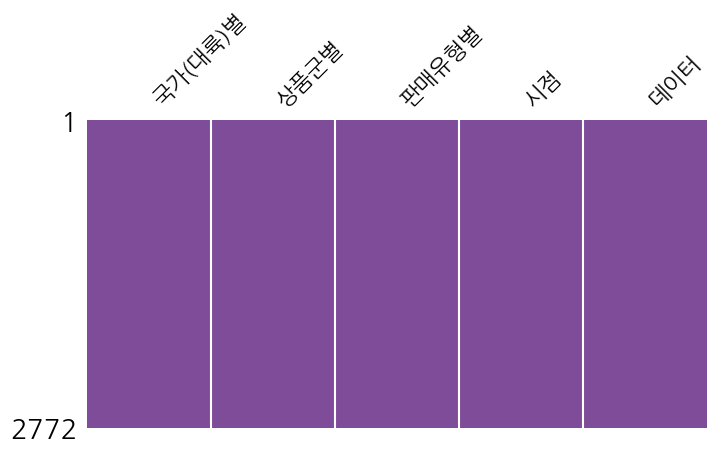

In [ ]:
#결측치 시각화
import missingno as msno

fig, ax = plt.subplots(figsize=(8, 4))  # 가로 6, 세로 4 크기의 그래프
msno.matrix(df=df.iloc[:, :], color=(0.5, 0.3, 0.6), ax=ax)

In [ ]:
df["판매유형별"].value_counts()

면세점 이외    2772
Name: 판매유형별, dtype: int64

## 📌 Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

* 데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
* describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
* 전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
* 데이터는 위에서 제공된 데이터를 사용합니다.
*해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!


✅⚡ 미션분석 및 추가기능 <br><br>
  &nbsp;&nbsp;&nbsp; 칼럼명을 변경할때 가능한 방법

- rename으로 칼럼명을 변경하는 경우
 - 기존의 데이터프레임을 수정하기 때문에 메모리 효율적
 - 원래 데이터와 연결을 유지하면서 칼럼명을 업데이트할 수 있음.
 - 다른 코드 블록에서 수정된 데이터프레임을 계속 사용할 수 있으므로 중복 작업을 피할 수 있음
예를 들어, 다음과 같이 rename 메서드를 사용하여 칼럼명을 변경할 수 있음:
```python
df.rename(columns={'old_column_name': 'new_column_name'}, inplace=True)
```
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

- apply를 활용해 새로운 칼럼을 만들때
 - 원래 데이터를 그대로 유지하면서 새로운 정보를 포함하는 칼럼을 만들 수 있음
 - 기존 데이터를 수정하지 않으므로 데이터의 무결성을 유지할 수 있습니다.
 - 다양한 변형 및 비교 분석을 수행할 때 유용합니다
 ```python
 df['new_column_name'] = df['old_column_name'].apply(lambda x: some_transformation(x))
```
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

- assign를 활용해서 새로운 데이타프레임을 만들때

 - 장점:원본 데이터프레임을 변경하지 않고 새로운 데이터프레임을 생성합니다. 여러 변형을 연쇄적으로 수행할 수 있습니다.
 - 단점: 메모리 사용량이 늘어날 수 있으며, 메모리 관리에 주의해야 합니다.예를 들어, assign 메서드로 새로운 칼럼을 추가할 수 있습니다: df.assign(new_column_name=df['old_column_name'])
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html


🚀🆙 고수가 되기위한 노력

 판다스 내에서도 정규표현식을 사용하는 방법이 있습니다.
 - ```python
df['분기'] = df['시점'].map(lambda x: int(x.split('.')[1].split('/')[0]))
```
- 위의 코드를 정규표현식을 사용하면 더 간결하게 표현가능합니다.

- ```python
df["분기"] = df["시점"].str.extract(r'(\d+)/').copy()
```

판다스에서 정규표현을 사용하는 방법에 대해서 공부해보도록 합시다.


In [ ]:
# 풀이 1-1 rename으로 변경하는 방식
df_total = df.rename(columns={'데이터': '백만'}).copy()
df_total

,국가(대륙)별,상품군별,판매유형별,시점,백만
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033
...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278
2768,기타,기 타,면세점 이외,2021.3/4,1154
2769,기타,기 타,면세점 이외,2021.4/4,1076
2770,기타,기 타,면세점 이외,2022.1/4,2325


In [ ]:
# 풀이 1-2 apply로 바꾸는 방식은 새로운 칼럼이 생성된다.
df_total['백만원'] = df_total['백만'].apply(lambda x: x)
df_total

,국가(대륙)별,상품군별,판매유형별,시점,백만,백만원
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2033
...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,1278
2768,기타,기 타,면세점 이외,2021.3/4,1154,1154
2769,기타,기 타,면세점 이외,2021.4/4,1076,1076
2770,기타,기 타,면세점 이외,2022.1/4,2325,2325


In [ ]:
# 풀이 1-3 assign은 기존 데이타 프레임을 변경하지 않고,새로운 데이타프레임을 생성하지만, 그만큼메모리를 사용한다.
df2 = df_total.assign(백만원=df_total['백만'])
df2

,국가(대륙)별,상품군별,판매유형별,시점,백만,백만원
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2033
...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,1278
2768,기타,기 타,면세점 이외,2021.3/4,1154,1154
2769,기타,기 타,면세점 이외,2021.4/4,1076,1076
2770,기타,기 타,면세점 이외,2022.1/4,2325,2325


In [ ]:
# 연도 분기 칼럼을 새로 생성
df_total['연도'] = df_total['시점'].map(lambda x: int(x.split('.')[0]))
df_total['분기'] = df_total['시점'].map(lambda x: int(x.split('.')[1].split('/')[0]))

df_total

,국가(대륙)별,상품군별,판매유형별,시점,백만,백만원,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2033,2018,1
...,...,...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,1278,2021,2
2768,기타,기 타,면세점 이외,2021.3/4,1154,1154,2021,3
2769,기타,기 타,면세점 이외,2021.4/4,1076,1076,2021,4
2770,기타,기 타,면세점 이외,2022.1/4,2325,2325,2022,1


In [ ]:
# 새로 제작한 칼럼이 수치형태로 되어있는지 확인
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  2772 non-null   object
 1   상품군별     2772 non-null   object
 2   판매유형별    2772 non-null   object
 3   시점       2772 non-null   object
 4   백만       2772 non-null   int64 
 5   백만원      2772 non-null   int64 
 6   연도       2772 non-null   int64 
 7   분기       2772 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 173.4+ KB


In [ ]:
# 통계수치
df_total.describe()

,백만,백만원,연도,분기
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,1613.116522,1613.116522,2019.272727,2.409091
std,4273.426107,4273.426107,1.600909,1.114533
min,-10003.000000,-10003.000000,2017.000000,1.000000
25%,41.750000,41.750000,2018.000000,1.000000
50%,291.500000,291.500000,2019.000000,2.000000
75%,1181.000000,1181.000000,2021.000000,3.000000
max,47689.000000,47689.000000,2022.000000,4.000000


⭐ 해당통계로 알수있는 정보
 - `백만, 연도, 분기` 칼럼에  2772 개의 정보가있습니다.
 - `평균치`는 `'백만' '연도' '분기'`가 각각 1613, 2019년  2.4분기이다.
 - 각각의 `표준편차`는 4270.6 1.6 1.11이다
 최소값을 -10003 2017 1이다
 - 상위` 25% 50% 75% 맥스치`에 대한 정보를 보여주고있습니다.

In [ ]:
# 통계치 판매액 중 마이너스가 있으므로
# 판매액에 마이너스가 있는지 확인
df_total[df_total['백만'] < 0]

,국가(대륙)별,상품군별,판매유형별,시점,백만,백만원,연도,분기
1102,아세안(ASEAN),화장품,면세점 이외,2017.3/4,-10003,-10003,2017,3


❓ 판매액이 마이너스일 수 있을까? 의문이 들어, 이에 대해서 chatGPT에게 물어봤습니다.

판매액에 마이너스가 있을 때는 일반적으로 비즈니스 상황에서 문제가 발생한 것을 나타낼 수 있습니다. 이러한 경우가 발생할 수 있는 몇 가지 이유는 다음과 같습니다:

- 환불 또는 반품: 고객이 제품을 반품하거나 환불을 요청한 경우 판매액에서 마이너스가 나타날 수 있습니다.

- 부정한 거래: 부정한 거래나 사기 행위로 인해 판매액에서 손실이 발생할 수 있습니다.

- 할인 또는 쿠폰: 할인 또는 쿠폰을 제공하는 경우 판매액에서 해당 할인액이 차감될 수 있으며, 이로 인해 판매액이 마이너스가 될 수 있습니다.

- 부적절한 재고 관리: 재고를 잘못 추적하거나 관리하지 않아 판매액에 마이너스가 발생할 수 있습니다.

손실인지 아니면 오기록인지 확인작업이 필요할듯 하지만, 현재로써는 가능하지 않으므로, 마이너스또한 가능한 수치라 여겨져 수정하지는 않기로 함

## 📌 Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.

국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

✅⚡ 미션분석 및 추가기능

1. 지금까지 배웠듯이 pivot_table로 할수있는 작업은 groupby 로도 할수있습니다.
자유자대로 판다스를 다룰수있을때까지, 여러가지 방식으로 지속적으로 시도해봅니다.

2. plotly express를 활용해 호버시 정보가 뜨거나 등의 기능을 가진 히트맵을 여러가지로  만들어봅니다.


🚀🆙 고수가 되기위한 노력

- plotly의 3d 그래픽도 공부해봅시다.
 - https://plotly.com/python/custom-buttons/

In [ ]:
#데이터확인
df_total

,국가(대륙)별,상품군별,판매유형별,시점,백만,백만원,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2033,2018,1
...,...,...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,1278,2021,2
2768,기타,기 타,면세점 이외,2021.3/4,1154,1154,2021,3
2769,기타,기 타,면세점 이외,2021.4/4,1076,1076,2021,4
2770,기타,기 타,면세점 이외,2022.1/4,2325,2325,2022,1


In [ ]:
# 풀이 2-1 pivot_table로 해봄
national_table = df_total.pivot_table(index='국가(대륙)별', columns='연도', values='백만', aggfunc='sum')
national_table

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


In [ ]:
# 풀이 2-2 groupby로 동일한 결과가 나오게 함
df_total.groupby(['국가(대륙)별', '연도'])['백만'].sum().unstack()

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


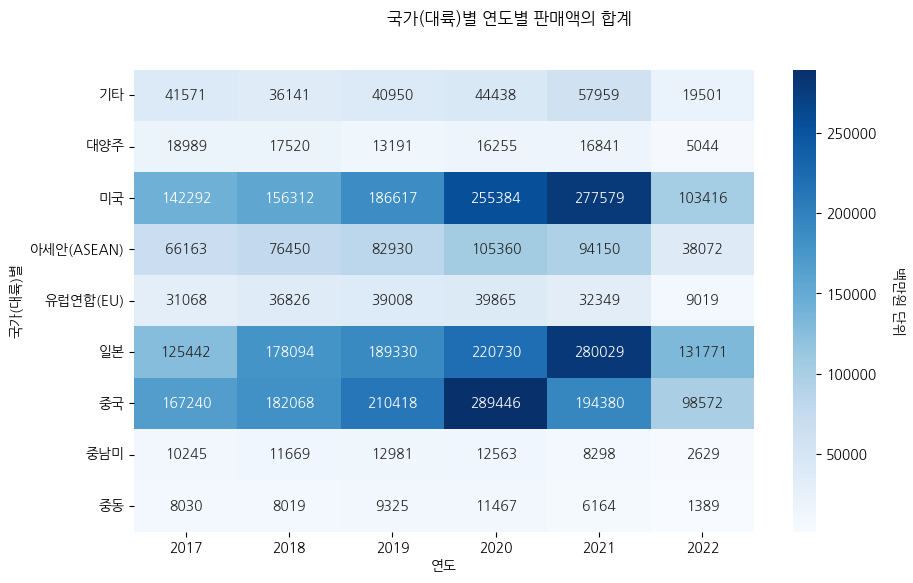

In [ ]:
#  히트뱁으로 표현해봄
plt.figure(figsize=(10, 6))
sns.heatmap(national_table, cmap='Blues', annot=True, fmt='.0f')

# 컬러바에 '백만' 표시
cax = plt.gcf().axes[-1]
cax.set_ylabel('백만원 단위', rotation=270, labelpad=20)
plt.suptitle('국가(대륙)별 연도별 판매액의 합계')

plt.show()

In [ ]:
# plotly express를 이용해 동일하게 표현해봅니다.
# 추가적으로 마우스 호버시 정보기능이 있어서 더 좋음
# 숫자가 커지면 자동으로 k를 붙여서 숫자를 줄여줌

fig = px.imshow(national_table, text_auto=True,
                color_continuous_scale=px.colors.sequential.YlGnBu )
# 배경 투명하게
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    height = 800,
    width = 1000
)
fig.update_coloraxes(colorbar_title="단위:백만원")
fig.update_layout(title="국가(대륙)별 연도별 판매액의 합계",title_x = 0.5,
                  )

fig.show()

In [ ]:
# 바이올린 플롯이 추가된 density heatmap
# 바이올린 플롯에도 마우스 호버시 추가정보가 뜸
fig = px.density_heatmap(df_total, x="연도", y="국가(대륙)별", z="백만",  marginal_x="violin", marginal_y="violin", text_auto=True)
fig.update_layout(width=1200, height=1000)
fig.show()

<Axes: xlabel='국가(대륙)별', ylabel='백만'>

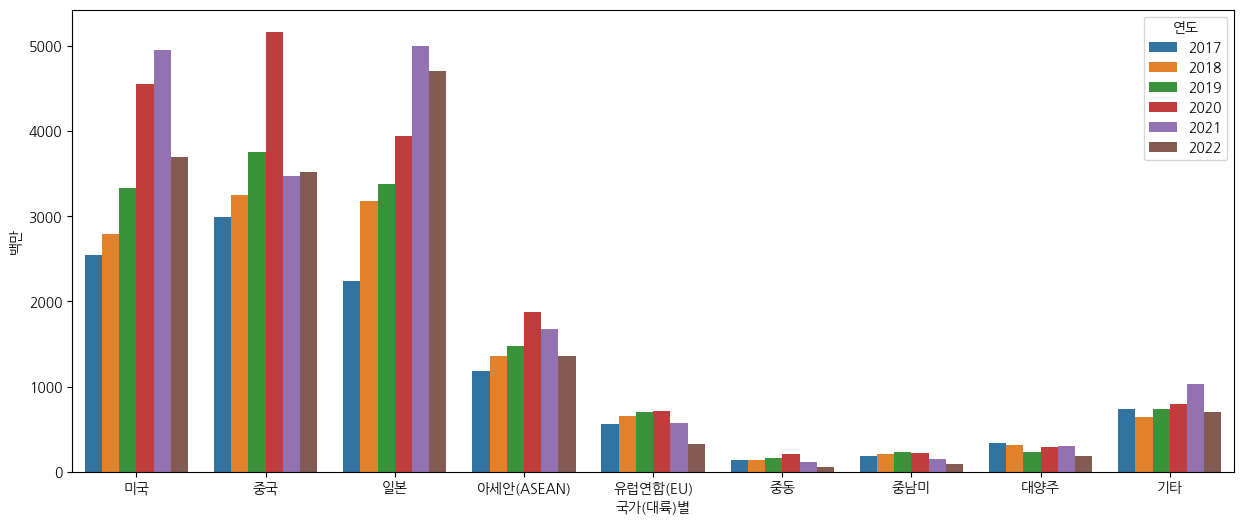

In [ ]:
# barplot으로 다른방식으로 명확하게 표현해봄
plt.figure(figsize=(15, 6))
sns.barplot(data=df_total, x='국가(대륙)별', y='백만', hue='연도',errorbar=None)

In [ ]:
#3d로 히트맵을 그려봅니다.

# create figure
fig = go.Figure()

# Add surface trace
fig.add_trace(go.Surface(z=national_table.values.tolist(), colorscale="Viridis"))

# Update plot sizing
fig.update_layout(
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    template="plotly_white",
)

# Update 3D scene options
fig.update_scenes(
    aspectratio=dict(x=1, y=1, z=0.7),
    aspectmode="manual"
)

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            type = "buttons",
            direction = "left",
            buttons=list([
                dict(
                    args=["type", "surface"],
                    label="3D Surface",
                    method="restyle"
                ),
                dict(
                    args=["type", "heatmap"],
                    label="Heatmap",
                    method="restyle"
                )
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.11,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Trace type:", showarrow=False,
                             x=0, y=1.08, yref="paper", align="left")
    ]
)

fig.show()

## 📌 Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

✅⚡ 미션분석 및 추가기능
1. 코로나 발생은 2019년 12월 부터라고 추정되므로 2019년에는 코로나로인한 경제효과가 거의 없던 시기입니다 따라서 코로나로 인한 해외온라인판매의 변화를 분석하기위해서 바로 전년도인 2019년과 비교하는것이 좋다고 보입니다. 두 데이타프레임의 차이로 코로나의 영향을 분석해봅니다.

1. 마찬가지로  groupby뿐 아니라  pivot_table 로도 해봅니다.

🚀🆙 고수가 되기위한 노력
- 비율을 이해하기 쉽게 보여주는 트리맵 만드는 방법을 공부해봅시다.
 - https://plotly.com/python/treemaps/

In [ ]:
#열음님 분석
grouped = df_total.groupby(["국가(대륙)별", "연도"])["백만"].sum()
result = grouped.unstack()
result

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


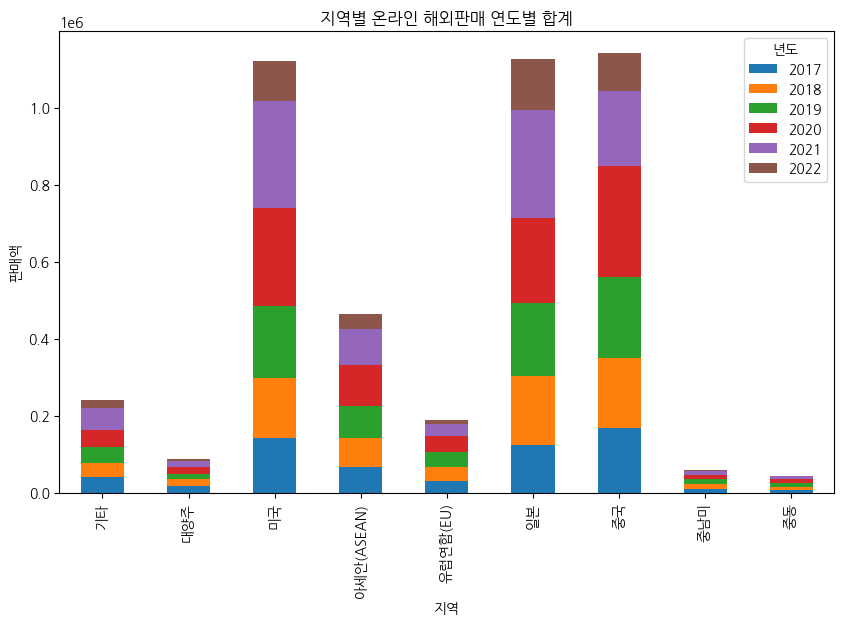

In [ ]:
# 각나라의 연도별 해외판매의 변화를 한눈에 알수있게 막대그래프로 표현합니다.
# 2020년도의 판매합계가 어떠했는지 각나라별로 해서 다른년도와 비교가능합니다.

result.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("지역별 온라인 해외판매 연도별 합계")
plt.xlabel("지역")
plt.ylabel("판매액")
plt.legend(title="년도", loc="upper right")
plt.show()

🥼 분석결과 1 -  쌓아올리는 막대그래프로 분석
- 막대그래프를 보듯이 코로나시기인 2020년도에 2019년도에 비해서 대다수의 국가가 온라인 해외판매가 증가했다는것을 알수있습니다.
- 그리고 코로나가 상당히 종식되어가던 2022년에는 온라인해외판매가 코로나 이전보다 적은 것을 알 수 있습니다.




In [ ]:
#groupby() 와 unstack()을 활용 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석
df_2019 = df_total[df_total['연도'] == 2019].copy()
df_2020 = df_total[df_total['연도'] == 2020].copy()
df_2020

,국가(대륙)별,상품군별,판매유형별,시점,백만,백만원,연도,분기
12,미국,컴퓨터 및 주변기기,면세점 이외,2020.1/4,1182,1182,2020,1
13,미국,컴퓨터 및 주변기기,면세점 이외,2020.2/4,1631,1631,2020,2
14,미국,컴퓨터 및 주변기기,면세점 이외,2020.3/4,1871,1871,2020,3
15,미국,컴퓨터 및 주변기기,면세점 이외,2020.4/4,1373,1373,2020,4
34,미국,가전·전자·통신기기,면세점 이외,2020.1/4,1818,1818,2020,1
...,...,...,...,...,...,...,...,...
2743,기타,생활용품 및 자동차용품,면세점 이외,2020.4/4,392,392,2020,4
2762,기타,기 타,면세점 이외,2020.1/4,939,939,2020,1
2763,기타,기 타,면세점 이외,2020.2/4,710,710,2020,2
2764,기타,기 타,면세점 이외,2020.3/4,826,826,2020,3


In [ ]:
df_2019_pivot = df_2019.groupby(['국가(대륙)별', '상품군별'])['백만'].sum().unstack()
df_2019_pivot

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
국가(대륙)별,,,,,,,,,,,,,,
기타,1625,2961,2,95,1792,4584,29,522,689,802,1259,5371,5051,16168
대양주,2328,673,1,25,1226,272,20,475,481,79,1540,2460,254,3357
미국,8297,21343,13,454,11704,8138,700,6764,5598,1357,19596,55125,5742,41786
아세안(ASEAN),9439,3978,33,2374,5604,4434,8,6118,5104,1456,7634,25420,824,10504
유럽연합(EU),3659,3298,0,35,2515,257,94,1424,1253,52,8507,3630,2478,11806
일본,2344,22813,18,2694,4980,574,14,778,578,3243,8712,131538,138,10906
중국,1558,4904,59,187,16809,5073,7,2004,4083,2144,36193,77844,108,59445
중남미,979,544,0,0,2140,646,17,304,265,0,4885,544,234,2423
중동,834,446,0,4,1572,294,20,180,156,27,1107,951,335,3399


In [ ]:
# 풀이 3-1 groupby + unstack
df_2020_pivot = df_2020.groupby(['국가(대륙)별', '상품군별'])['백만'].sum().unstack()
df_2020_pivot

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
국가(대륙)별,,,,,,,,,,,,,,
기타,1716,3345,9,187,1464,4563,21,755,1646,1596,1410,6501,5653,15572
대양주,3825,923,1,21,1198,367,20,690,484,403,1800,3746,318,2459
미국,10103,38731,33,398,11467,9709,865,5862,4934,2706,32919,82154,6057,49446
아세안(ASEAN),12405,2620,17,3279,6432,4192,3,7423,2698,4291,16135,37992,541,7332
유럽연합(EU),3040,3907,0,25,2560,514,99,1297,1354,423,12092,5120,1910,7524
일본,404,30509,2,1526,3911,1055,27,646,1353,4699,14738,119452,193,42215
중국,1353,22736,88,403,7142,6659,4,3999,5606,4220,125078,73068,235,38855
중남미,912,625,0,3,1361,188,15,183,151,774,6421,614,362,954
중동,839,533,0,4,1060,139,17,196,121,927,3250,1776,388,2217


In [ ]:
# 풀이 3-2 pivot_table
df_2020.pivot_table( index = '국가(대륙)별', columns='상품군별', values= '백만', aggfunc='sum')

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
국가(대륙)별,,,,,,,,,,,,,,
기타,1716,3345,9,187,1464,4563,21,755,1646,1596,1410,6501,5653,15572
대양주,3825,923,1,21,1198,367,20,690,484,403,1800,3746,318,2459
미국,10103,38731,33,398,11467,9709,865,5862,4934,2706,32919,82154,6057,49446
아세안(ASEAN),12405,2620,17,3279,6432,4192,3,7423,2698,4291,16135,37992,541,7332
유럽연합(EU),3040,3907,0,25,2560,514,99,1297,1354,423,12092,5120,1910,7524
일본,404,30509,2,1526,3911,1055,27,646,1353,4699,14738,119452,193,42215
중국,1353,22736,88,403,7142,6659,4,3999,5606,4220,125078,73068,235,38855
중남미,912,625,0,3,1361,188,15,183,151,774,6421,614,362,954
중동,839,533,0,4,1060,139,17,196,121,927,3250,1776,388,2217


In [ ]:
# 국가(대륙)별 온라인 쇼핑의 2020년에 2019년 보다 늘어난 수치를 구해봅니다.
# 마이너스(-)는 줄어든 수치입니다.

df_after_corona = df_2020_pivot - df_2019_pivot
df_after_corona

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
국가(대륙)별,,,,,,,,,,,,,,
기타,91,384,7,92,-328,-21,-8,233,957,794,151,1130,602,-596
대양주,1497,250,0,-4,-28,95,0,215,3,324,260,1286,64,-898
미국,1806,17388,20,-56,-237,1571,165,-902,-664,1349,13323,27029,315,7660
아세안(ASEAN),2966,-1358,-16,905,828,-242,-5,1305,-2406,2835,8501,12572,-283,-3172
유럽연합(EU),-619,609,0,-10,45,257,5,-127,101,371,3585,1490,-568,-4282
일본,-1940,7696,-16,-1168,-1069,481,13,-132,775,1456,6026,-12086,55,31309
중국,-205,17832,29,216,-9667,1586,-3,1995,1523,2076,88885,-4776,127,-20590
중남미,-67,81,0,3,-779,-458,-2,-121,-114,774,1536,70,128,-1469
중동,5,87,0,0,-512,-155,-3,16,-35,900,2143,825,53,-1182


🥼 분석2 - 수치자료를 통한 분석

- 2020년과 2019년의 데이타의 차이로 알수있는 것들은 다음과 같습니다.
 - 식료품소비는 오히려 코로나 전보다 늘어 사람들이 불안감에 식료품을 많이 구입했다는것을 알 수 있습니다.

 - 음반, 비디오, 악기는 전지역에서 모두 크게 소비가 늘어
코로사가 발생하면서 주택에서 취미생활을 즐기는 비중이 커진것을 알수있습니다.

 - 화장품소비는 미국과 일본을 제외하고는 모두 줄어들었습니다.
이에 관해 코로나로인한 문화적 차이를 추가로 조사해볼 필요가 있어보입니다.

 - 자동차 용품은 아세안을 제외하고는 대체로 줄어들었습니다.
코로나로 인해 재택근무나 외출자제로 영향을 받은것을 알수있습니다.

 - 레저용품은 의외로 지역에 따라서 늘기도하고 줄기도였습니다. 집단취미가 아닌경우에는 문화나 지역에 따라서 영향이 다를수있어보입니다.

 - 의류및 패션상품은 일본과 중국을 제외하고는 소비가 늘었습니다.






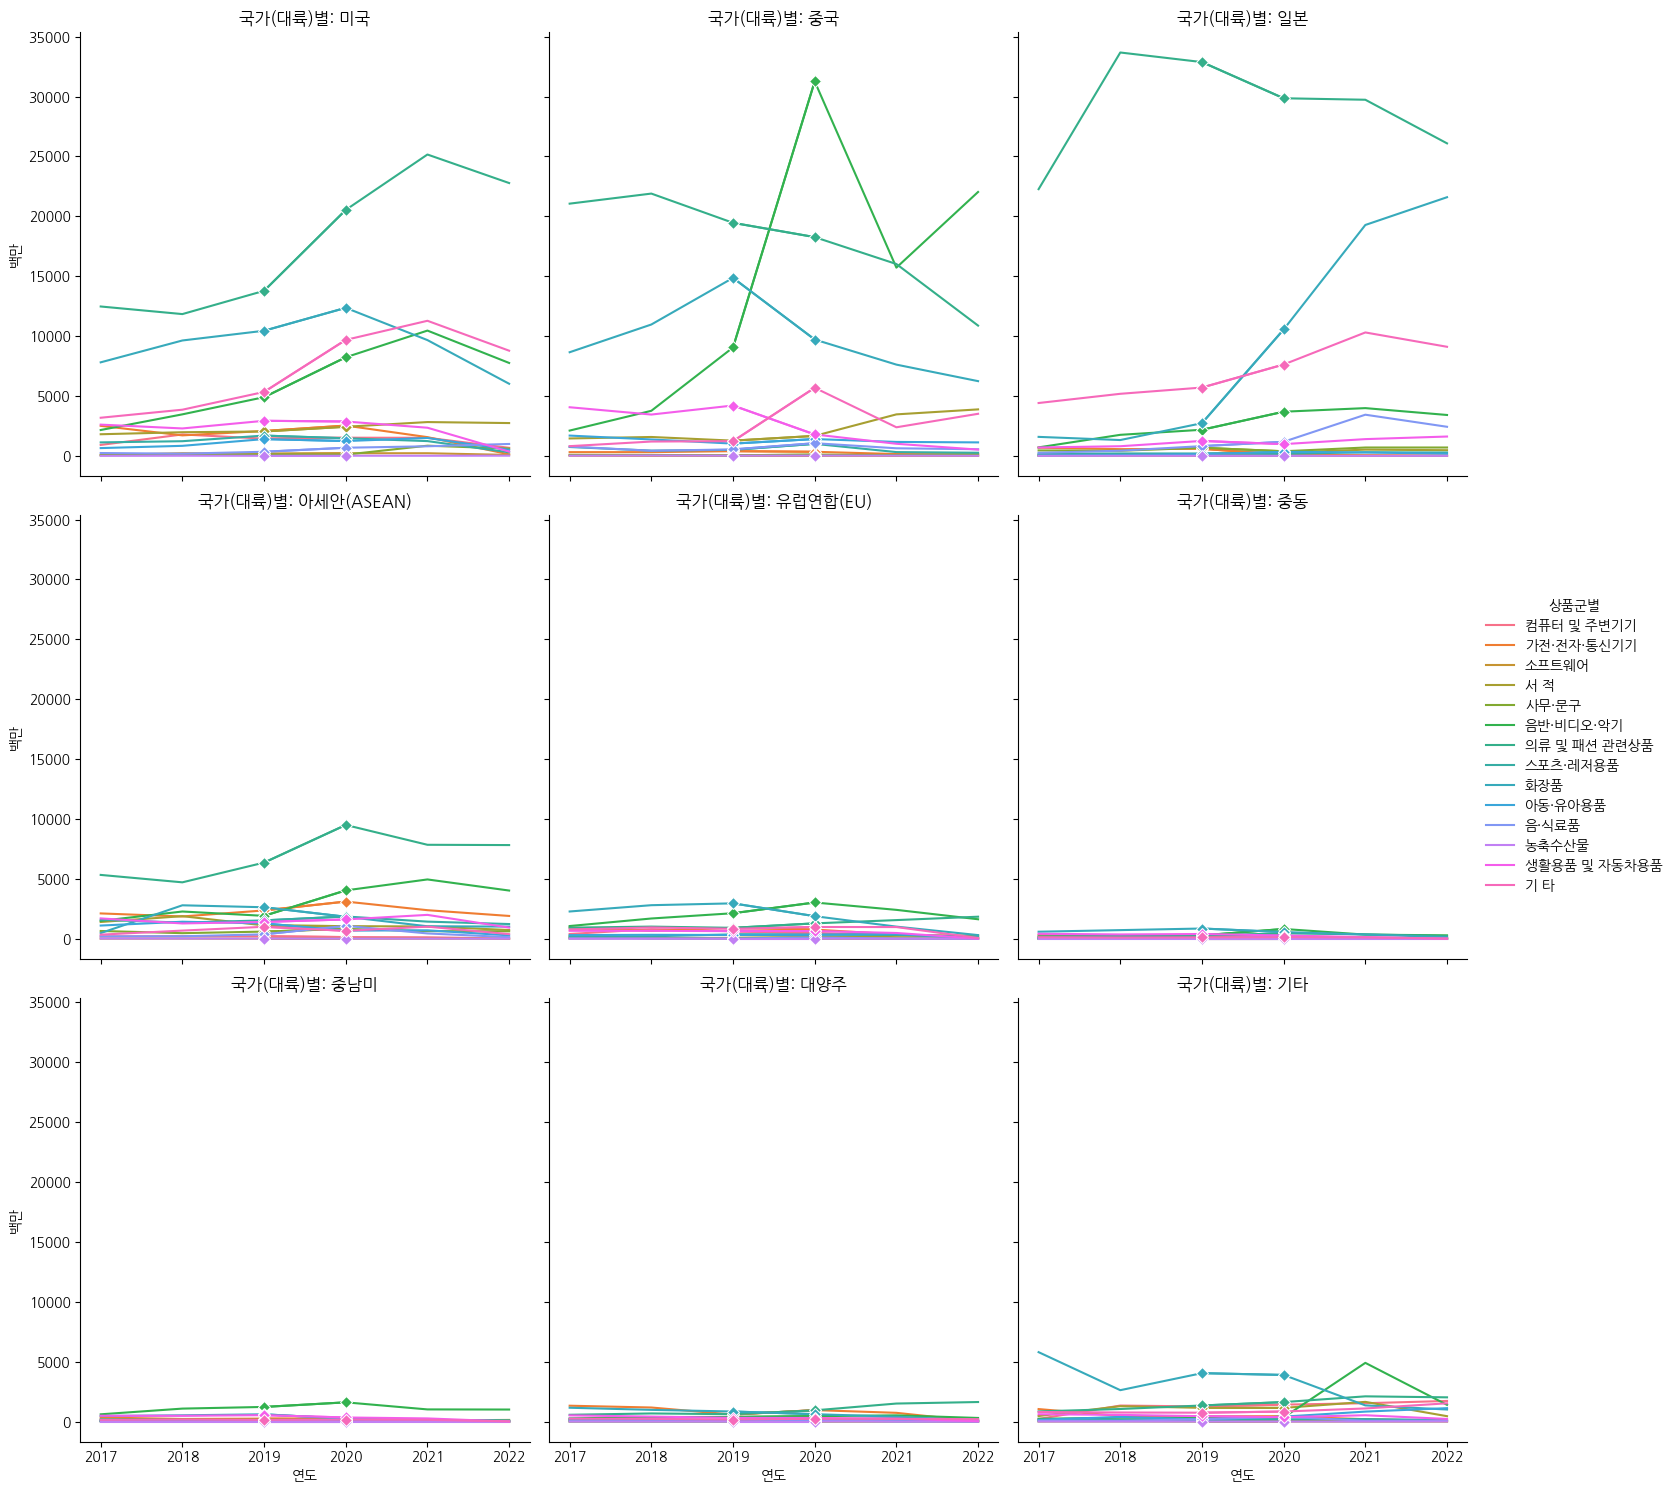

In [ ]:
g = sns.relplot(data=df_total, x='연도', y='백만', hue='상품군별', kind='line', col='국가(대륙)별', col_wrap=3, errorbar=None)
g.set_axis_labels("연도", "백만")

# 2019년과 2020년 데이터 필터링
data_2019_20 = df_total[(df_total['연도'] == 2019) | (df_total['연도'] == 2020)]

unique_countries = data_2019_20['국가(대륙)별'].unique()


for i, country in enumerate(unique_countries):
    title = f"국가(대륙)별: {country}"
    g.axes[i].set_title(title, fontsize=12)
    sns.lineplot(data=data_2019_20[data_2019_20['국가(대륙)별'] == country], x='연도', y='백만', hue='상품군별', marker='D', ax=g.axes[i], legend=False, errorbar=None)

plt.show()


마커종류<br>
원: 'o'
사각형: 's'
세모포: '^'
별표: '*'
다이아몬드: 'D'
엑스표: 'x'

In [ ]:
#lineplot으로는 국가별 차이가 커서 비율을 알기 어려우므로 트리맵으로 그려봅니다.
df_2019_tree = df_2019.groupby(['국가(대륙)별', '상품군별'])['백만'].sum().reset_index()
df_2020_tree = df_2020.groupby(['국가(대륙)별', '상품군별'])['백만'].sum().reset_index()


In [ ]:
fig = px.treemap(df_2019_tree, path =['국가(대륙)별','상품군별'],
                 values = '백만',
                 color = '상품군별',
                 color_continuous_scale='viridis')

fig.update_layout(height=480, width=1700)

fig.update_layout(title_text=" 2019년 코로나전 온라인 판매")
fig.show()

fig1 = px.treemap(df_2020_tree, path =['국가(대륙)별','상품군별'],
                 values = '백만',
                 color = '상품군별',
                 color_continuous_scale='viridis')

fig1.update_layout(height=480, width=1700)
fig1.update_layout(title_text=" 2020년 코로나후 온라인 판매")

fig1.show()

#클릭시 해당 사각형 내의 하위비율의 트리맵을 보여줍니다. 상단을 누르면 상위트리로 되돌아감. 예> 국가이름을 눌러보세요.

🥼 분석결과 3 - 트리맵을 통한 분석
- 트리맵을 통해서도 다른 직관적 분석을 할수있습니다.

 - 미국은 코로나 전과후가 매출비율에 큰 차이가 없는것을 알수있습니다.

 - 음반비디오악기는 거의 전지역에서 성장했지만 특히 중국에서 두드러집니다.

🥼 이처럼 수치분석, 시각화 분석을 병행해서 봐야 충분한 해석이 가능하므로,  다양한 방식의 분석이 필요함을 알수있습니다.


## 📌 Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!
시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.



✅⚡ 미션분석 및 추가기능
1. 불리언 방식으로 풀어봅니다.
2. isin() 메서드를 활용해 더 간단히 해결하는 방법을 시도해봅니다.
3. query() 메서드를 활용 SQL 방식으로도 해봅니다.
- 본인이 사용하지 않더라도 타인의 코드를 이용하기위해서는 다양한 방법을 알아둘 필요가있습니다.

🚀🆙 고수가 되기위한 노력

- 판다스에는 SQL질의문과 유사한 query메서드가있습니다.
 - 주로 데이터 프레임을 필터링하는데 유용합니다.
 -
```python
result = df.query('age >= 30 and gender == "여성"')
```
- query 메서드를 사용하면 데이터프레임을 효과적으로 필터링하고 분석할 수 있습니다.

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

In [ ]:
# 풀이 4-1 불리언 방법
df_name = df_total[((df_total['상품군별'] == "의류 및 패션 관련상품")
                   | (df_total['상품군별'] == "화장품")
                   | (df_total['상품군별'] == "음반·비디오·악기"))
                   &((df_total['국가(대륙)별'] == "미국")
                   | (df_total['국가(대륙)별'] == "일본")
                   | (df_total['국가(대륙)별'] == "중국"))
]
df_name

,국가(대륙)별,상품군별,판매유형별,시점,백만,백만원,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,1922,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,1778,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2281,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2647,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2362,2018,1
...,...,...,...,...,...,...,...,...
809,일본,화장품,면세점 이외,2021.2/4,18768,18768,2021,2
810,일본,화장품,면세점 이외,2021.3/4,23380,23380,2021,3
811,일본,화장품,면세점 이외,2021.4/4,22555,22555,2021,4
812,일본,화장품,면세점 이외,2022.1/4,26664,26664,2022,1


In [ ]:
# 풀이 4-2 isin() 메소드 활용
selected_data = df_total[(df_total['국가(대륙)별'].isin(["미국", "중국", "일본"]))
& (df_total['상품군별'].isin(["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"]))]
selected_data

,국가(대륙)별,상품군별,판매유형별,시점,백만,백만원,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,1922,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,1778,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2281,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2647,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2362,2018,1
...,...,...,...,...,...,...,...,...
809,일본,화장품,면세점 이외,2021.2/4,18768,18768,2021,2
810,일본,화장품,면세점 이외,2021.3/4,23380,23380,2021,3
811,일본,화장품,면세점 이외,2021.4/4,22555,22555,2021,4
812,일본,화장품,면세점 이외,2022.1/4,26664,26664,2022,1


In [ ]:
# 풀이 4-3 query 메서드를 활용
selected_data2 = df_total.query('`국가(대륙)별` in ["미국", "중국", "일본"] and `상품군별` in ["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"]')
selected_data2

,국가(대륙)별,상품군별,판매유형별,시점,백만,백만원,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,1922,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,1778,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2281,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2647,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2362,2018,1
...,...,...,...,...,...,...,...,...
809,일본,화장품,면세점 이외,2021.2/4,18768,18768,2021,2
810,일본,화장품,면세점 이외,2021.3/4,23380,23380,2021,3
811,일본,화장품,면세점 이외,2021.4/4,22555,22555,2021,4
812,일본,화장품,면세점 이외,2022.1/4,26664,26664,2022,1


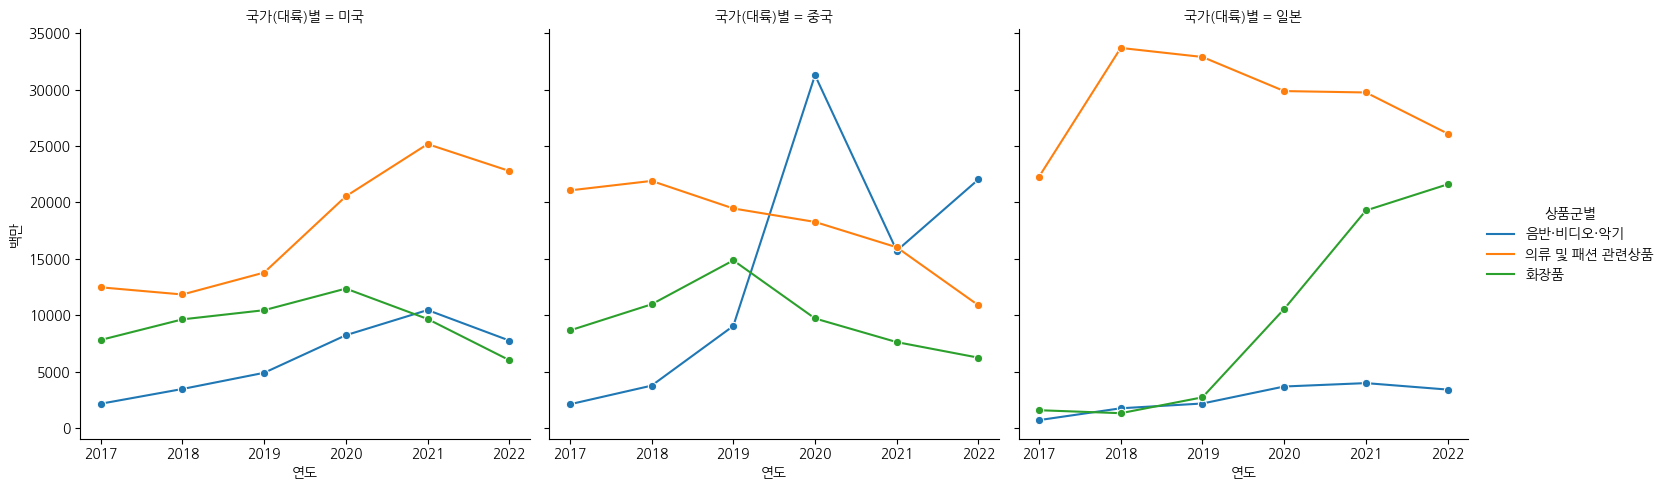

In [ ]:
sns.relplot(df_name, x='연도', y='백만', kind='line', col='국가(대륙)별', col_wrap=3, marker='o',
            hue='상품군별',
            errorbar=None)


## 📌 Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!

지금까지 익힌 방법으로 다른 데이터에도 같은 방법을 통해 분석해 볼 수 있을 것입니다.
KOSIS(https://kosis.kr/) 사이트에서 관심있는 분야의 데이터를 찾고 원하는 시각화를 해주세요!
조회조건에 계, 합계 등을 미리 제거하고 다운로드 받으면 전처리를 줄일 수 있습니다.
행렬전환 기능을 사용하면 따로 melt를 진행하지 않아도 되기 때문에 이 또한 전처리를 줄일 수 있습니다.

✅⚡ 미션분석 및 추가기능

1. 분석주제는 <b>정신질환 유병율</b>입니다.
- 이에 4개의 파일을 다운받아서 합치는 과정을 거칩니다.(남성 1년유병율, 남성 평생 유병율, 여성 1년 유병율, 여성 평생 유병율)
- 필요한 전처리가 어떤것인지 미리하기도하지만 작업하면서 피드백받아 처리하기도 했습니다.
- 정신질환별 유병율을 시각화 해봅니다.
 - 이경우 어떠한 그래프가 효과적일까에서 직관적으로 크기의 차이를 보여주는 버블차트를 활용하기로했습니다.

2. groupby를 활용하는 것으로 treemap을 사용한 시각화도 시도해봅니다.


🚀🆙 고수가 되기위한 노력
- plotly의 버블차트 만드는 방법을 공부해봅시다
 - https://plotly.com/python/bubble-charts/

❓ 용어해설

🤒  일년유병율(Annual Disease Prevalence):

일년유병율은 특정 질병이 어느 한 해 동안 얼마나 흔하게 나타나는지를 나타내는 숫자에요.
예를 들어, 만약 우리 학교에 1000명의 학생이 있고, 그 중 10명이 한 해 동안 독감에 걸렸다면, 독감의 일년유병율은 10/1000 x 100% = 1%가 됩니다.

🤒 평생유병율(Lifetime Disease Prevalence):

평생유병율은 한 사람이 그 질병에 평생 동안 얼마나 걸릴 가능성이 있는지를 보여주는 숫자에요.
예를 들어, 만약 평균적으로 한 사람이 평생 동안 5%의 확률로 독감에 걸릴 것으로 예상된다면, 독감의 평생유병율은 5%입니다.
간단히 말해, 일년유병율은 한 해 동안 어느 정도로 질병이 퍼져 있는지를 보여주고, 평생유병율은 한 사람이 평생 동안 그 질병에 걸릴 가능성을 보여줍니다.






###✨ 데이타 검토 및 전처리

In [ ]:
# 남성정신질환 1년 유병율 파일
df_mental_man_1year = pd.read_csv('data/남성에서_정신장애_일년유병율_비교__성과_연령의_보정__20231030044006.csv',
                                  encoding='cp949')
df_mental_man_1year.head(3)

,정신장애세분별(1),정신장애세분별(2),2001,2001.1,2006,2006.1,2011,2011.1,2016,2016.1
0,정신장애세분별(1),정신장애세분별(2),유병율 (%),표준오차 (%),유병율 (%),표준오차 (%),유병율 (%),표준오차 (%),유병율 (%),표준오차 (%)
1,알코올사용장애,소계,11.0,0.6,8.7,1.0,6.6,0.6,5.0,0.6
2,알코올사용장애,알코올의존,6.9,0.5,4.7,0.7,3.2,0.4,2.2,0.4


In [ ]:
# 하나의 파일로 합치기위한 컬럼추가
df_mental_man_1year['성별'] = '남성'
df_mental_man_1year['유병율'] = '일년'
# 0번행에 삭제해도 되는 정보가있으므로 삭제
df_mental_man_1year= df_mental_man_1year.drop(0)
df_mental_man_1year.head()

,정신장애세분별(1),정신장애세분별(2),2001,2001.1,2006,2006.1,2011,2011.1,2016,2016.1,성별,유병율
1,알코올사용장애,소계,11.0,0.6,8.7,1.0,6.6,0.6,5.0,0.6,남성,일년
2,알코올사용장애,알코올의존,6.9,0.5,4.7,0.7,3.2,0.4,2.2,0.4,남성,일년
3,알코올사용장애,알코올남용,4.1,0.4,4.0,0.4,3.4,0.5,2.8,0.5,남성,일년
4,니코틴사용장애,소계,12.1,0.6,10.8,1.0,7.0,0.6,4.5,0.5,남성,일년
5,니코틴사용장애,니코틴의존,10.8,0.6,9.2,1.0,5.5,0.6,3.8,0.5,남성,일년


In [ ]:
# 여성정신질환 1년 유병율
df_mental_woman_1year = pd.read_csv('data/여성에서_정신장애_일년유병율_비교__성과_연령의_보정__20231030044332.csv',
                                    encoding='cp949')
df_mental_woman_1year['성별'] = '여성'
df_mental_woman_1year['유병율'] = '일년'

df_mental_woman_1year= df_mental_woman_1year.drop(0)

In [ ]:
# 남성정신질환 평생 유병율
df_mental_man_life = pd.read_csv('data/남성에서_정신장애_평생유병율_비교__성과_연령의_보정__20231030044124.csv',
                                 encoding='cp949')
# 하나의 파일로 합치기위한 컬럼추가
df_mental_man_life['성별'] = '남성'
df_mental_man_life['유병율'] = '평생'
df_mental_man_life= df_mental_man_life.drop(0)

In [ ]:
# 여성정신질환 평생 유병율
df_mental_woman_life = pd.read_csv('data/여성에서_정신장애_평생유병율_비교__성과_연령의_보정__20231030044509.csv',
                                   encoding='cp949')
df_mental_woman_life['성별'] = '여성'
df_mental_woman_life['유병율'] = '평생'
df_mental_woman_life= df_mental_woman_life.drop(0)

In [ ]:
#4개의 데이타프레임을 합침
df_mental = pd.concat(
    [df_mental_man_1year, df_mental_man_life, df_mental_woman_1year, df_mental_woman_life]).copy()
df_mental.head(3)

,정신장애세분별(1),정신장애세분별(2),2001,2001.1,2006,2006.1,2011,2011.1,2016,2016.1,성별,유병율
1,알코올사용장애,소계,11.0,0.6,8.7,1.0,6.6,0.6,5.0,0.6,남성,일년
2,알코올사용장애,알코올의존,6.9,0.5,4.7,0.7,3.2,0.4,2.2,0.4,남성,일년
3,알코올사용장애,알코올남용,4.1,0.4,4.0,0.4,3.4,0.5,2.8,0.5,남성,일년


In [ ]:
# 남녀간 값을 통일시킴

df_mental = df_mental.applymap(lambda x: '알코올남용' if  x == '알코올 남용' else x)
df_mental = df_mental.applymap(lambda x: '알코올의존' if  x == '알코올 의존' else x)
df_mental = df_mental.applymap(lambda x: '니코틴의존' if  x == '니코틴 의존' else x)
df_mental = df_mental.applymap(lambda x: '니코틴금단' if  x == '니코틴 금단' else x)
df_mental = df_mental.applymap(lambda x: '알코올 사용장애' if  x == '알코올사용장애' else x)
df_mental = df_mental.applymap(lambda x: '니코틴 사용장애' if  x == '니코틴사용장애' else x)


In [ ]:
#소계 컬럼 제거
df_mental = df_mental[df_mental['정신장애세분별(2)'] != '소계'].copy()
df_mental.head(3)

,정신장애세분별(1),정신장애세분별(2),2001,2001.1,2006,2006.1,2011,2011.1,2016,2016.1,성별,유병율
2,알코올 사용장애,알코올의존,6.9,0.5,4.7,0.7,3.2,0.4,2.2,0.4,남성,일년
3,알코올 사용장애,알코올남용,4.1,0.4,4.0,0.4,3.4,0.5,2.8,0.5,남성,일년
5,니코틴 사용장애,니코틴의존,10.8,0.6,9.2,1.0,5.5,0.6,3.8,0.5,남성,일년


In [ ]:
df_mental.columns

Index(['정신장애세분별(1)', '정신장애세분별(2)', '2001', '2001.1', '2006', '2006.1', '2011',
       '2011.1', '2016', '2016.1', '성별', '유병율'],
      dtype='object')

In [ ]:
# 오차칼럼 제거
df_mental.drop(['2001.1', '2006.1', '2011.1', '2016.1'], axis=1,
               inplace=True)

In [ ]:
# 숫자의 타입 확인
df_mental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 2 to 28
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   정신장애세분별(1)  81 non-null     object
 1   정신장애세분별(2)  81 non-null     object
 2   2001        81 non-null     object
 3   2006        81 non-null     object
 4   2011        81 non-null     object
 5   2016        81 non-null     object
 6   성별          81 non-null     object
 7   유병율         81 non-null     object
dtypes: object(8)
memory usage: 5.7+ KB


정신질환 유병율 분석
e: 추정치, p: 잠정치, -: 자료없음, ...: 미상자료, x: 비밀보호, ▽: 시계열 불연속

In [ ]:
# 수집되지 않은 정보는 0으로 설정해서 그래프그리는데 사용
df_mental = df_mental.replace('-', 0)

In [ ]:
# 문자열을 숫자형으로 변환
df_mental['2001'] = df_mental['2001'].map(lambda x: float(x))
df_mental['2006'] = df_mental['2006'].map(lambda x: float(x))
df_mental['2011'] = df_mental['2011'].map(lambda x: float(x))
df_mental['2016'] = df_mental['2016'].map(lambda x: float(x))
df_mental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 2 to 28
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   정신장애세분별(1)  81 non-null     object 
 1   정신장애세분별(2)  81 non-null     object 
 2   2001        81 non-null     float64
 3   2006        81 non-null     float64
 4   2011        81 non-null     float64
 5   2016        81 non-null     float64
 6   성별          81 non-null     object 
 7   유병율         81 non-null     object 
dtypes: float64(4), object(4)
memory usage: 5.7+ KB


In [ ]:
# 정신장애 분별2가 세부항목으로 정신장애분별1을 굳이 표시안해도 되는 경우, 년도별 유병율을 만들어봄

df_mental_year =df_mental[df_mental['유병율'] == '일년'].copy()
df_mental_year.tail(3)

,정신장애세분별(1),정신장애세분별(2),2001,2006,2011,2016,성별,유병율
27,신체형장애,전환장애,0.3,0.5,0.8,0.0,여성,일년
28,신체형장애,동통장애,0.3,0.4,0.6,0.0,여성,일년
29,신체형장애,건강염려증,0.3,0.8,0.7,0.0,여성,일년


In [ ]:
df_mental_life =df_mental[df_mental['유병율'] == '평생'].copy()
df_mental_life.head(3)

,정신장애세분별(1),정신장애세분별(2),2001,2006,2011,2016,성별,유병율
2,알코올 사용장애,알코올의존,12.1,10.3,7.6,6.4,남성,평생
3,알코올 사용장애,알코올남용,13.1,15.2,13.0,11.8,남성,평생
5,니코틴 사용장애,니코틴의존,17.1,13.9,9.6,8.3,남성,평생


###🍇   시각화하기
- 버블차트와 트리맵

In [ ]:
# 1년 유병율을 버블차트로 그리기
# 각각의 칼럼에 대한 그래프 생성
fig1 = px.scatter(df_mental_year, y="정신장애세분별(2)", x="성별", size="2001", color="성별")
fig2 = px.scatter(df_mental_year, y="정신장애세분별(2)", x="성별", size="2006", color="성별")
fig3 = px.scatter(df_mental_year, y="정신장애세분별(2)", x="성별", size="2011", color="성별")
fig4 = px.scatter(df_mental_year, y="정신장애세분별(2)", x="성별", size="2016", color="성별")

# 마커크기 키움
for fig in [fig1, fig2, fig3, fig4]:
    for trace in fig.data:
        trace.marker.size *= 3

# 서브플롯트 생성
fig = make_subplots(rows=1, cols=4)

# 각 그래프를 서브플롯트에 추가
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig1.data[1], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig2.data[1], row=1, col=2)
fig.add_trace(fig3.data[0], row=1, col=3)
fig.add_trace(fig3.data[1], row=1, col=3)
fig.add_trace(fig4.data[0], row=1, col=4)
fig.add_trace(fig4.data[1], row=1, col=4)



fig.update_layout(
    annotations=[
        dict(text="2001년 1년 유병율", x=0.1, y=1.05, xref="paper", yref="paper", showarrow=False),
        dict(text="2006년 1년 유병율", x=0.41, y=1.05, xref="paper", yref="paper", showarrow=False),
        dict(text="2011년 1년 유병율", x=0.7, y=1.05, xref="paper", yref="paper", showarrow=False),
        dict(text="2016년 1년 유병율", x=1, y=1.05, xref="paper", yref="paper", showarrow=False),
    ]
)

# 두 번째 그래프부터 Y 축 눈금 숨기기
for i in range(2, 5):
    fig.update_yaxes(showticklabels=False, row=1, col=i)


# 레이아웃 설정
fig.update_layout(height=900, width=1200)

# 그래프 표시
fig.show()




In [ ]:
# 평생유병율을 버블차트로 그리기

fig5 = px.scatter(df_mental_life, y="정신장애세분별(2)", x="성별", size="2001", color="성별")
fig6 = px.scatter(df_mental_life, y="정신장애세분별(2)", x="성별", size="2006", color="성별")
fig7 = px.scatter(df_mental_life, y="정신장애세분별(2)", x="성별", size="2011", color="성별")
fig8 = px.scatter(df_mental_life, y="정신장애세분별(2)", x="성별", size="2016", color="성별")

# 마커크기 키움
for fig in [fig5, fig6, fig7, fig8]:
    for trace in fig.data:
        trace.marker.size *= 3
# 서브플롯트 생성
fig = make_subplots(rows=1, cols=4)

fig.add_trace(fig5.data[0], row=1, col=1)
fig.add_trace(fig5.data[1], row=1, col=1)
fig.add_trace(fig6.data[0], row=1, col=2)
fig.add_trace(fig6.data[1], row=1, col=2)
fig.add_trace(fig7.data[0], row=1, col=3)
fig.add_trace(fig7.data[1], row=1, col=3)
fig.add_trace(fig8.data[0], row=1, col=4)
fig.add_trace(fig8.data[1], row=1, col=4)

fig.update_layout(
    annotations=[
        dict(text="2001년 평생 유병율", x=0.1, y=1.05, xref="paper", yref="paper", showarrow=False),
        dict(text="2006년 평생 유병율", x=0.41, y=1.05, xref="paper", yref="paper", showarrow=False),
        dict(text="2011년 평생 유병율", x=0.74, y=1.05, xref="paper", yref="paper", showarrow=False),
        dict(text="2016년 평생 유병율", x=1, y=1.05, xref="paper", yref="paper", showarrow=False),
    ]
)

# 두 번째 그래프부터 Y 축 눈금 숨기기
for i in range(2, 5):
    fig.update_yaxes(showticklabels=False, row=1, col=i)

# 레이아웃 설정
fig.update_layout(height=900, width=1200)

# 그래프 표시
fig.show()

🔄 KOSIS에서 제공하는 2011년 정신질환 평생 유병율에서 '여성'의 경우 남성의 데이타가 그대로 적혀져있는 오류가있습니다.

In [ ]:
# treemap을 그리기 위한 가공
# 2001년 1년 유병율
df_mental_year_2001 = df_mental_year.groupby(['성별','정신장애세분별(1)','정신장애세분별(2)'])['2001'].max().reset_index()
df_mental_year_2001 = df_mental_year_2001[df_mental_year_2001['2001'] != 0].copy()


# 2001년 평생유병율
df_mental_life_2001 = df_mental_life.groupby(['성별','정신장애세분별(1)','정신장애세분별(2)'])['2001'].max().reset_index()
df_mental_life_2001 = df_mental_life_2001[df_mental_life_2001['2001'] != 0].copy()

fig = px.treemap(df_mental_year_2001, path =['성별','정신장애세분별(1)','정신장애세분별(2)'],
                 values = '2001',
                 color = '2001',
                 color_continuous_scale='viridis')

fig.update_layout(height=500, width=1500)
fig.update_layout(
    coloraxis_colorbar=dict(title='<b>2001년<br>정신질환<br>일년유병율</b>'))
fig.show()

fig5 = px.treemap(df_mental_life_2001, path =['성별','정신장애세분별(1)','정신장애세분별(2)'],
                 values = '2001',
                 color = '2001',
                 color_continuous_scale='viridis')

fig5.update_layout(height=480, width=1500)
fig5.update_layout(
    coloraxis_colorbar=dict(title='<b>2001년<br>정신질환<br>평생유병율</b>'))
fig5.show()
#클릭시 해당 사각형 내의 하위비율의 트리맵을 보여줍니다. 상단을 누르면 상위트리로 되돌아감. 예> 여성이라는 부분을 눌러보세요

In [ ]:
# treemap을 그리기 위한 가공

# 2006년 1년 유병율
df_mental_year_2006 = df_mental_year.groupby(['성별','정신장애세분별(1)','정신장애세분별(2)'])['2006'].max().reset_index()
df_mental_year_2006 = df_mental_year_2006[df_mental_year_2006['2006'] != 0].copy()

# 2011년 1년 유병율
df_mental_year_2011 = df_mental_year.groupby(['성별','정신장애세분별(1)','정신장애세분별(2)'])['2011'].max().reset_index()
df_mental_year_2011 = df_mental_year_2011[df_mental_year_2011['2011'] != 0].copy()

# 2016년 1년 유병율
df_mental_year_2016 = df_mental_year.groupby(['성별','정신장애세분별(1)','정신장애세분별(2)'])['2016'].max().reset_index()
df_mental_year_2016 = df_mental_year_2016[df_mental_year_2016['2016'] != 0].copy()

In [ ]:

# 2006년 평생유병율
df_mental_life_2006 = df_mental_life.groupby(['성별','정신장애세분별(1)','정신장애세분별(2)'])['2006'].max().reset_index()
df_mental_life_2006 = df_mental_life_2006[df_mental_life_2006['2006'] != 0].copy()

# 2011년 평생유병율
df_mental_life_2011 = df_mental_life.groupby(['성별','정신장애세분별(1)','정신장애세분별(2)'])['2011'].max().reset_index()
df_mental_life_2011 = df_mental_life_2011[df_mental_life_2011['2011'] != 0].copy()

# 2016년 평생유병율
df_mental_life_2016 = df_mental_life.groupby(['성별','정신장애세분별(1)','정신장애세분별(2)'])['2016'].max().reset_index()
df_mental_life_2016 = df_mental_life_2016[df_mental_life_2016['2016'] != 0].copy()

In [ ]:
fig = px.treemap(df_mental_year_2001, path =['성별','정신장애세분별(1)','정신장애세분별(2)'],
                 values = '2001',
                 color = '2001',
                 color_continuous_scale='viridis')

fig.update_layout(height=500, width=1500)
fig.update_layout(
    coloraxis_colorbar=dict(title='<b>2001년<br>정신질환<br>일년유병율</b>'))
fig.show()

fig2 = px.treemap(df_mental_year_2006, path =['성별','정신장애세분별(1)','정신장애세분별(2)'],
                 values = '2006',
                 color = '2006',
                 color_continuous_scale='viridis')

fig2.update_layout(height=500, width=1500)
fig2.update_layout(
    coloraxis_colorbar=dict(title='<b>2006년<br>정신질환<br>일년유병율</b>'))
fig2.show()

fig3 = px.treemap(df_mental_year_2011, path =['성별','정신장애세분별(1)','정신장애세분별(2)'],
                 values = '2011',
                 color = '2011',
                 color_continuous_scale='viridis')

fig3.update_layout(height=500, width=1500)
fig3.update_layout(
    coloraxis_colorbar=dict(title='<b>2011년<br>정신질환<br>일년유병율</b>'))
fig3.show()

fig4 = px.treemap(df_mental_year_2016, path =['성별','정신장애세분별(1)','정신장애세분별(2)'],
                 values = '2016',
                 color = '2016',
                 color_continuous_scale='viridis')

fig4.update_layout(height=500, width=1500)
fig4.update_layout(
    coloraxis_colorbar=dict(title='<b>2016년<br>정신질환<br>일년유병율</b>'))
fig4.show()



fig5 = px.treemap(df_mental_life_2001, path =['성별','정신장애세분별(1)','정신장애세분별(2)'],
                 values = '2001',
                 color = '2001',
                 color_continuous_scale='viridis')

fig5.update_layout(height=480, width=1500)
fig5.update_layout(
    coloraxis_colorbar=dict(title='<b>2001년<br>정신질환<br>평생유병율</b>'))
fig5.show()

fig6 = px.treemap(df_mental_life_2006, path =['성별','정신장애세분별(1)','정신장애세분별(2)'],
                 values = '2006',
                 color = '2006',
                 color_continuous_scale='viridis')

fig6.update_layout(height=480, width=1500)
fig6.update_layout(
    coloraxis_colorbar=dict(title='<b>2006년<br>정신질환<br>평생유병율</b>'))
fig6.show()

fig7 = px.treemap(df_mental_life_2011, path =['성별','정신장애세분별(1)','정신장애세분별(2)'],
                 values = '2011',
                 color = '2011',
                 color_continuous_scale='viridis')

fig7.update_layout(height=480, width=1500)
fig7.update_layout(
    coloraxis_colorbar=dict(title='<b>2011년<br>정신질환<br>평생유병율</b>'))
fig7.show()

fig8 = px.treemap(df_mental_life_2016, path =['성별','정신장애세분별(1)','정신장애세분별(2)'],
                 values = '2016',
                 color = '2016',
                 color_continuous_scale='viridis')

fig8.update_layout(height=480, width=1500)
fig8.update_layout(
    coloraxis_colorbar=dict(title='<b>2016년<br>정신질환<br>평생유병율</b>'))
fig8.show()

### 🥼 분석결과 정리
- 정신장애 유병율은 대체적으로 남성이 여성보다 크다.
- 남성은 알코올 사용장애와 니코틴 사용장애가 다수이다.
- 여성은 불안장애와 기분장애가 다수이다.
- 남성에게서 알코올 사용장애와 니코틴 사용장애를 제외한다면 기타 정신질환 유병율은 여성에 비해서 매우낮다
- 다운받은 자료에서 2011년 여성의 평생유병율이 남성의 것으로 오입력되어있다는것을 발견했다.

## ⛲ 미션후기

1. 데이타를 다운받아서 가공하는 일에는 정말 많은 주의를 기울여야 하고 널값만 아니라 띄어쓰기의 차이등도 면밀히 살펴서 전처리를 해야한다는 것을 알았습니다. 실제로 전처리에만 상당한 작업이 들어갔습니다.

2. 마지막 미션이라서 그전에 써보지 않았던 많은 시각화를 새롭게 해보려고했습니다. 버블차트, 트리맵, 그리고 3d 시각화도 새롭게 시도해봤습니다.특히 트리맵은 비율을 직관적으로 알수있어서 매우 훌륭한 시각화 수단으로 보였습니다.

3. 타팀의 우수미션등에 query 메서드를 쓰는것을 보고, 본인이 사용하지 않더라도 타인의 코드를 이해하려면 다양한 것을 공부해놔야 한다는 것을 느꼈습니다.

4. 다운받은 자료에서 여성평생 유병율이 남성의 것과 동일하게 기입되어있는것을 발견했습니다. 그래서 데이타를 신뢰할수있는 충분히검토하는 과정이 필요하다는 생각이 들었습니다.

5. 3번문항의 경우 자료의 가공과 그래프의 성향에 따라서, 다른 인사이트를 얻을수있다는 것을 알게되었습니다. 따라서 분석을 위해서는 수치데이타, 시각화자료 등 다양한 방식으로 숨겨진 의미를 찾아내는데에 노련해질 필요성이 있다고 느껴집니다.

6. 마지막 주차에도 최선을 다해서열심히 하려고했습니다. 지금까지 열심히 달려온 팀원분들과 자상하게 지도해주신 코치님에게 진심으로 감사를 드립니다.